In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import pandas as pd
import time
import mpld3
from mpld3 import utils
from mpld3 import plugins

mpld3.enable_notebook()

In [2]:
import json
from twython import Twython
import ConfigParser
from dateutil import parser

propertiesFile = "my.properties"
cp = ConfigParser.ConfigParser()
cp.readfp(open(propertiesFile))

APP_KEY            = cp.get('Params', 'app_key')
APP_SECRET         = cp.get('Params', 'app_secret')
OAUTH_TOKEN        = cp.get('Params', 'oauth_token')
OAUTH_TOKEN_SECRET = cp.get('Params', 'oauth_token_secret')

twitter = Twython(APP_KEY, APP_SECRET, OAUTH_TOKEN, OAUTH_TOKEN_SECRET)

In [3]:
tname = 'noellesio'
data = twitter.show_user(screen_name=tname)

In [4]:
dts = []
tweets = twitter.get_user_timeline(screen_name=tname, count=200)
while len(tweets) > 0:
    for tweet in tweets:
        dt = pd.to_datetime(tweet['created_at']) - pd.DateOffset(hours=8)
        dts.append(dt)
    last = tweet['id']
    print last
    tweets = twitter.get_user_timeline(screen_name=tname, count=200, max_id = last-1)
    time.sleep(1)

538181375535230977
429045639289126912
179065190208385024
1790402056


In [11]:
filter = tseries>'2015-01-01'
tseries2015 = tseries[filter]

In [12]:
tseries = pd.Series(dts)
df = pd.DataFrame({'dow': tseries2015.apply(lambda x: x.dayofweek), 'hour': tseries2015.apply(lambda x: x.hour), 'c': 1})

In [13]:
df.head()

,c,dow,hour
0,1,1,0
1,1,0,15
2,1,6,7
3,1,5,7
4,1,4,18


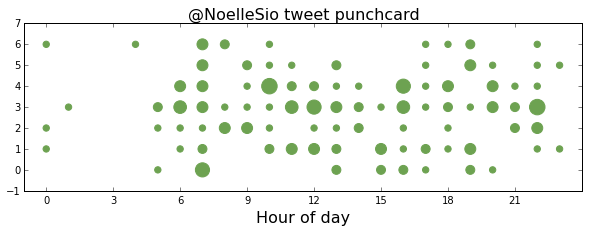

In [15]:
gb = pd.DataFrame(df.groupby(['dow', 'hour'])['c'].sum())
gb.reset_index(inplace=True)
fig = plt.figure(figsize=(10,3))
plt.scatter(gb.hour, gb.dow, s=gb.c * 40, color='#6da251')
plt.xlabel('Hour of day', fontsize=16)
plt.title('@NoelleSio tweet punchcard', fontsize=16)
plt.xlim(-1, 24)
#plt.gca().yaxis.set_ticks(np.arange(7), ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
h=np.arange(8)*3
plt.xticks(h, h)
plt.savefig('noelle.png',bbox_inches='tight')
plugins.clear(fig)

In [17]:
output = mpld3.fig_to_html(fig)
f = open('noelle.php', 'w')
f.write(output)
f.close()